# Import Library

In [1]:
import requests 
import time
from bs4 import BeautifulSoup 
import concurrent.futures
import pandas as pd 

from sklearn import preprocessing
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Function

In [2]:
set_list = []
set_info = {}


### BEGINNING

def start():
    while True:
        ## SET Size
        size = input(""" for SET50 type \'50\'
                        for SET100 type \'100\':  """)
        if size == '50':
            scrape_set('50')
            break
        elif size == '100':
            scrape_set('100')
            break
            
    while True:
        val = input(""" for FAST query type \'1\'
                        for NORMAL query type \'2\':  """)
        if val == '1':
            run_scraping_parallel()
            break
        elif val == '2':
            run_scraping_normal()
            break
          
        
def run_scraping_parallel():
    start = time.perf_counter()
    with concurrent.futures.ThreadPoolExecutor() as executor:
        executor.map(scrape_data,set_list) #RUN HERE
        time.sleep(5)   
    end = time.perf_counter()
    print(f"Total Time Used : {end-start}")
#     get_latest_data()

def run_scraping_normal():
    start = time.perf_counter()
    for symbol in set_list: #RUN HERE
        scrape_data(symbol)
        time.sleep(5)
        print(f'{symbol} Added, Please Wait')
    
    end = time.perf_counter()
    print(f"Total Time Used : {end-start}")
#     get_latest_data() 


#GET SET list
def scrape_set(amount):
    url=""
    if amount == '50':
        url = "https://marketdata.set.or.th/mkt/sectorquotation.do"
    elif amount == '100':
        url = "https://marketdata.set.or.th/mkt/sectorquotation.do?sector=SET100"
    else: print('Error')
        
    result=requests.get(url)
    src = result.content
    soup = BeautifulSoup(src,'lxml')
    table = soup.find_all("table",class_="table-info")
    table = table[2]
    for data in table.find_all("td",style="text-align: left;"):
        symbol = data.find('a').text
        symbol = symbol.replace('\n', '').replace('\r', '').replace('    ', '') #Remove new line 
        set_list.append(symbol)  
        set_info[symbol]= {} #Make dictionary

    
#GET Comparing data
def scrape_data(symbol):
  # if symbol not in set_info: #Check whether in dictionary or not
    result=requests.get(f"https://www.set.or.th/set/companyhighlight.do?symbol={symbol}&ssoPageId=5&language=en&country=US")
    src = result.content
    soup = BeautifulSoup(src,'lxml')
    soup=soup.find('table', class_='table table-hover table-info')
    table = soup.find('tbody')
    heading=['Assets', 'Liabilities', 'Equity', 'Paid-up Capital', 'Revenue', 'Net Profit', 'EPS (Baht)', 
            'ROA(%)', 'ROE(%)', 'Net Profit Margin(%)', 'Last Price(Baht)', 'Market Cap.', 
            'P/E', 'P/BV', 'Book Value per share (Baht)', 'Dvd. Yield(%)']
    key = ''
    
    #Quries Available date/month/year
    head = soup.find('thead').find_all('strong')
    
    set_info[symbol]['date']=[] #Make dictionary
    for date in head[1:]:
        date= str(date).split('<br/>')
        date = date[1].replace("</strong>", '')
        set_info[symbol]['date'].append(date) #Append numbers to dictionary   
       
    #Queries from table row
    for row in table.find_all("tr"):
      #Inside each of every rows from table row
        for data in row.find_all("td"):
            temp=data.text
        #Removing Unused word/heading
            if temp in heading:
              key = temp
              set_info[symbol][key] = [] #Make dictionary
            elif '.' in temp:
              temp = temp.replace('\xa0', '')
              set_info[symbol][key].append(temp) #Append numbers to dictionary
            else:
              break
    print(f'{symbol} Added, Please Wait')

        

      
#Insert Data to CSV file
def data_to_csv():
    df = pd.DataFrame(set_info) 
    # saving the dataframe 
    df.to_csv(r'/Users/bobbymacbook/desktop/github/stockscraping/newdata2.csv') 

In [3]:
data_to_csv()

# Cleaning Data

In [4]:
### Wrangling Data

# Show Specific Data
def find_value(symbol,key='_'): 
    df = pd.DataFrame(set_info) 
    if key== '_':
        x = df.loc[:,[symbol]]
    else:
        x=df.at[key,symbol] #locate specific row and column
    return x

# Filter only latest data     
def get_latest_data():
      for sym in set_info:
          for head in set_info[sym]:
              if not set_info[sym][head]:#if list is blank
                  temp=set_info[sym][head]
                  res = str(temp)[1:-1]
                  res = res.replace("\'", "")
                  set_info[sym][head]=None
              else:
                  temp=set_info[sym][head][-1:]
                  res = str(temp)[1:-1]
                  res = res.replace("\'", "")
                  set_info[sym][head]=res  
         
# Convert Currency/String to float
def clean_data():  
    for sym in set_info:
        for head in set_info[sym]:
            if not set_info[sym][head]:#if list is blank
                continue
            else:
                temp_list=[]
                for i in set_info[sym][head]: # select each val in each header
                    temp=i.replace(",","").replace("*","")
                    temp_list.append(temp)
                set_info[sym][head]=temp_list 
                
# Normalizing Data           
# https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
def normalize_data():
    for sym in set_info:
        for head in set_info[sym]:
            try:
                array = np.array(set_info[sym][head])
                normalized = preprocessing.normalize([array])
                res = normalized[0]
                set_info[sym][head]=res
            except:
                continue
                

# Running Script

In [17]:
#Normal Scraping SET
start()

 for SET50 type '50'
                        for SET100 type '100':  100
 for FAST query type '1'
                        for NORMAL query type '2':  2
0Stock Added, Please Wait
1Stock Added, Please Wait
2Stock Added, Please Wait
3Stock Added, Please Wait
4Stock Added, Please Wait
5Stock Added, Please Wait
6Stock Added, Please Wait
7Stock Added, Please Wait
8Stock Added, Please Wait
9Stock Added, Please Wait
10Stock Added, Please Wait
11Stock Added, Please Wait
12Stock Added, Please Wait
13Stock Added, Please Wait
14Stock Added, Please Wait
15Stock Added, Please Wait
16Stock Added, Please Wait
17Stock Added, Please Wait
18Stock Added, Please Wait
19Stock Added, Please Wait
20Stock Added, Please Wait
21Stock Added, Please Wait
22Stock Added, Please Wait
23Stock Added, Please Wait
24Stock Added, Please Wait
25Stock Added, Please Wait
26Stock Added, Please Wait
27Stock Added, Please Wait
28Stock Added, Please Wait
29Stock Added, Please Wait
30Stock Added, Please Wait
31Stock Added, Please

In [5]:
#Parallel Scraping SET
start()

 for SET50 type '50'
                        for SET100 type '100':  100
 for FAST query type '1'
                        for NORMAL query type '2':  1
AWC Added, Please Wait
BGRIM Added, Please Wait
AOT Added, Please Wait
BCPG Added, Please Wait
BTS Added, Please Wait
BDMS Added, Please Wait
BPP Added, Please Wait
AP Added, Please Wait
BCH Added, Please Wait
BEC Added, Please Wait
BANPU Added, Please Wait
BJC Added, Please WaitBEM Added, Please Wait

BCP Added, Please Wait
ADVANC Added, Please Wait
BH Added, Please Wait
AMATA Added, Please Wait
BGC Added, Please Wait
AEONTS Added, Please Wait
BBL Added, Please Wait
CBG Added, Please Wait
CK Added, Please Wait
CKP Added, Please Wait
CENTEL Added, Please Wait
CHG Added, Please Wait
CRC Added, Please Wait
COM7 Added, Please Wait
CPALL Added, Please Wait
CPF Added, Please Wait
ERW Added, Please Wait
DELTA Added, Please Wait
CPN Added, Please Wait
EGCO Added, Please Wait
EA Added, Please Wait
DTAC Added, Please Wait
EPG Added, Please Wait


In [8]:
#Working on Dataset

clean_data()
# get_latest_data()
# normalize_data()
df = pd.DataFrame(set_info) 
df[['ADVANC']]

,ADVANC
date,"[31/12/2016, 31/12/2017, 31/12/2018, 31/12/201..."
Assets,"[275670.35, 284067.35, 290504.99, 289669.12, 3..."
Liabilities,"[232962.02, 233640.57, 232836.40, 220274.95, 3..."
Equity,"[42568.88, 50320.35, 57521.04, 69266.10, 64643..."
Paid-up Capital,"[2973.10, 2973.10, 2973.10, 2973.18, 2973.18]"
Revenue,"[152717.99, 158477.17, 170835.31, 181654.32, 4..."
Net Profit,"[30666.54, 30077.31, 29682.18, 31189.57, 6756.19]"
EPS (Baht),"[10.31, 10.12, 9.98, 10.49, 2.27]"
ROA(%),"[17.53, 14.73, 14.20, 14.54, 12.34]"
ROE(%),"[67.44, 64.76, 55.05, 49.20, 50.09]"


# DATA PLOT

In [13]:
#### DATA PLOT ####

#Get data from Dict
def plot_stock(stock,key='all'):
    df = pd.DataFrame(set_info)
    if key == 'all': 
        heading=['Assets', 'Liabilities', 'Equity', 'Paid-up Capital', 'Revenue', 'Net Profit', 'EPS (Baht)', 
            'ROA(%)', 'ROE(%)', 'Net Profit Margin(%)', 'Last Price(Baht)', 'Market Cap.', 
            'P/E', 'P/BV', 'Book Value per share (Baht)', 'Dvd. Yield(%)']
        for key in heading:
            plot_stock(stock,key)
        
    else:  
        try:
            stock_data=df.loc[key,stock]
            year=df.loc['date',stock]

            #Seaborn Plot
            sns.set_style("dark")
            plt.figure(figsize=(7,5)) #(Width,Height)
            splot=sns.barplot(year, stock_data, palette='coolwarm')
            sns.despine()
            plt.xlabel("Announced Date")
            plt.ylabel("Values (Million Baht)")
            plt.title(f"{stock} {key}")
            sns.set()
            for p in splot.patches:
                splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
       
        except ValueError:
            print(f'Error on {key}')

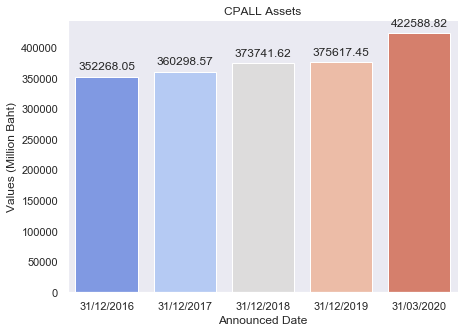

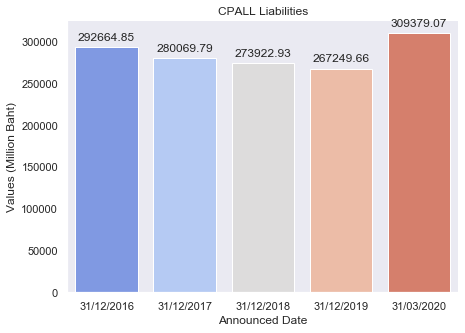

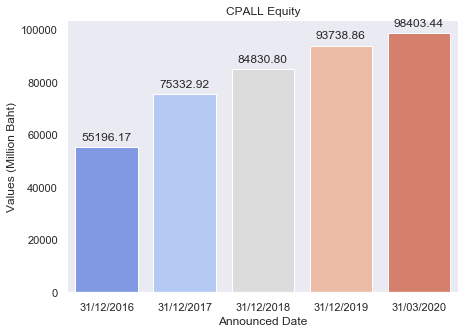

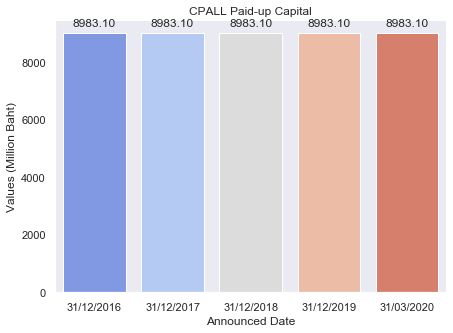

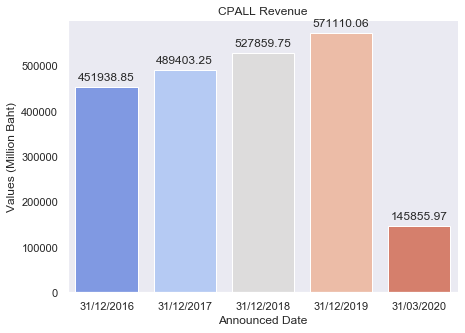

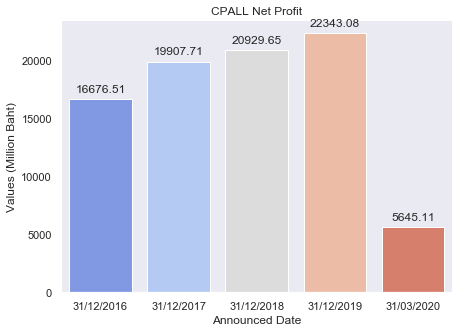

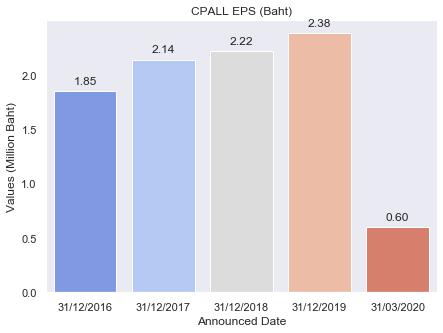

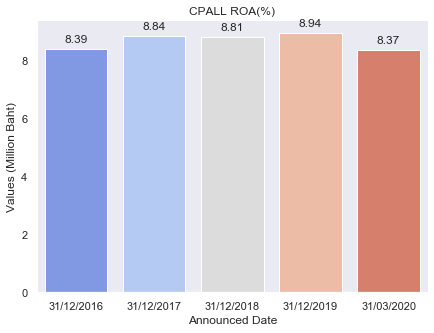

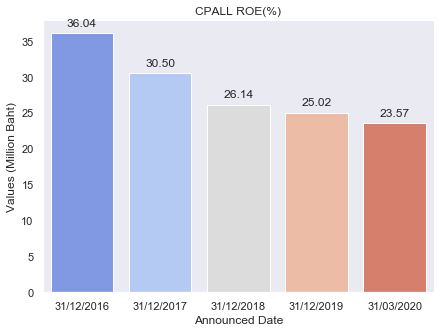

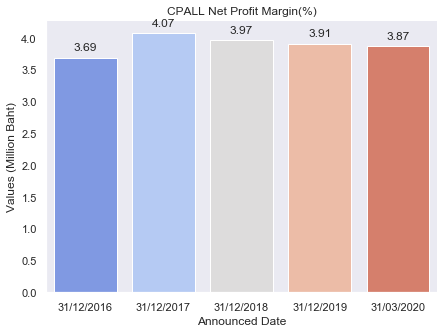

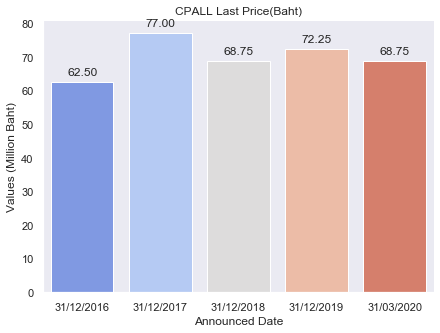

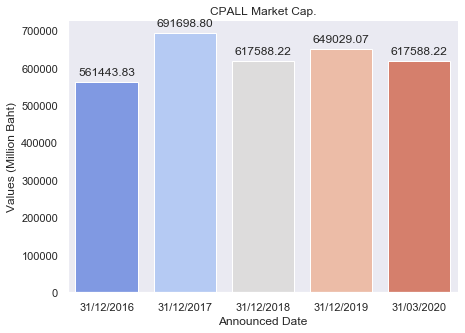

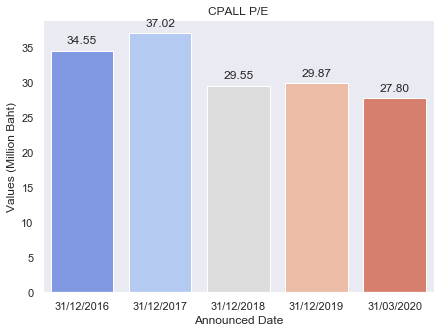

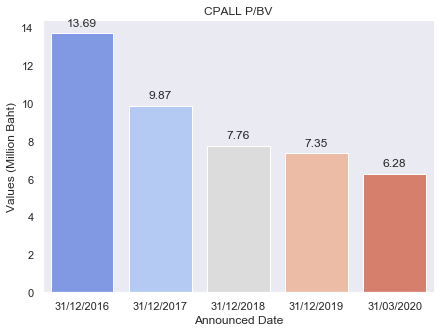

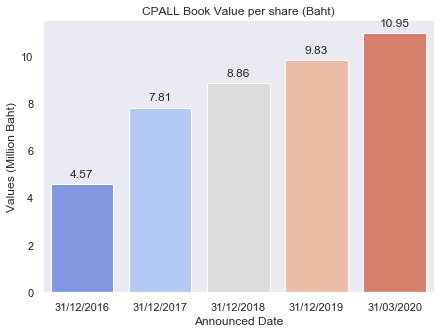

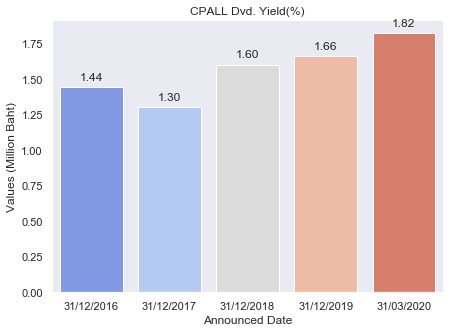

In [15]:
plot_stock('CPALL')